

*   3/10/2024
* Noah Caulfield
* HW3 Linear Regression
* CS 460- Applied Machine Learning
*For Eastern New Mexico University


## Objective

In this assignment you will build a simple linear regression model and a polynomial regression model.

Then, you will compare the results to determine which one produces the best results.

### Import the libraries and methods needed for this project

In [107]:
""" Import the libraries

numpy
pandas
matplotlib
From sklearn import
- Linear Regression
- Polynomial Features
- Label Encoder
- Train-Test split
- metrics: MAE, MSE, R2 Score

"""

#<--- Your code goes here --->
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score

### Load the data from the file "insurance.csv"

The file is on Canvas

In [18]:
# The path will depend on your Google Drive
#<--- Your code goes here --->
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [108]:
# The path will depend on your Google Drive
#<--- Your code goes here --->
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding
for column in ['sex', 'smoker', 'region']:
    df[column + '_idx'] = label_encoder.fit_transform(df[column])

# Define the new column order
column_order = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_idx', 'smoker_idx', 'region_idx']

# Reorder the columns
df = df[column_order]

# Get the first 5 and the last 5 rows
top_rows = df.head(5)
bottom_rows = df.tail(5)

# make single row DataFrame
ellipsis_row = pd.DataFrame([['...'] * len(df.columns)], columns=df.columns, index=['...'])

# ellipsis row between both sets
df_subset = pd.concat([top_rows, ellipsis_row, bottom_rows])

In [110]:
# Show the new data
#<--- Your code goes here --->
df_subset    #print


,age,sex,bmi,children,smoker,region,charges,sex_idx,smoker_idx,region_idx
0,19,female,27.9,0,yes,southwest,16884.924,0,1,3
1,18,male,33.77,1,no,southeast,1725.5523,1,0,2
2,28,male,33.0,3,no,southeast,4449.462,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.88,0,no,northwest,3866.8552,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483,1,0,1
1334,18,female,31.92,0,no,northeast,2205.9808,0,0,0
1335,18,female,36.85,0,no,southeast,1629.8335,0,0,2
1336,21,female,25.8,0,no,southwest,2007.945,0,0,3


### Split the dataframe into X and y

In [111]:
# Use the following columns for X: "age", "sex_idx", "smoker_idx", "region_idx", "bmi", "children"
# Use 'charges' for the target variable

#<--- Your code goes here --->
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the DataFrame from location
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'sex', 'smoker', and 'region' columns
df['sex_idx'] = label_encoder.fit_transform(df['sex'])
df['smoker_idx'] = label_encoder.fit_transform(df['smoker'])
df['region_idx'] = label_encoder.fit_transform(df['region'])

# Specify the feature and target variable
X = df[['age', 'sex_idx', 'smoker_idx', 'region_idx', 'bmi', 'children']]
y = df['charges']

# Show the first few rows of the features DataFrame and the target variable to confirm the setup
#print(X.head())
#print(y.head())



### Let's first create a simple Linear Regression model

#### Get train and test data

In [123]:
# use 80% for training and 20% for testing. Use 42 as the random seed.

#<--- Your code goes here --->
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Check the size of the result sets
#(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#### Print the number of rows and columns for each dataset

In [113]:
#<--- Your code goes here --->
print(f"X Train shape: {X_train.shape}")
print(f"y Train shape: {y_train.shape}")
print(f"X Test shape: {X_test.shape}")
print(f"y Test shape: {y_test.shape}")


X Train shape: (1070, 6)
y Train shape: (1070,)
X Test shape: (268, 6)
y Test shape: (268,)


### Create a simple Linear Regression model

In [114]:
#New Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# instantiate new model
model = LinearRegression()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the mean squared error and R^2 score for the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 33635210.431178406
R^2 Score: 0.7833463107364539


#### Make predictions using the test data

In [115]:
#<--- Your code goes here --->
# Making predictions with the test data
y_pred = model.predict(X_test)

# Displaying few predictions
for i, prediction in enumerate(y_pred[:5]):
    print(f"Prediction {i + 1}: {prediction:.2f}")

Prediction 1: 8924.41
Prediction 2: 7116.30
Prediction 3: 36909.01
Prediction 4: 9507.87
Prediction 5: 27013.35


### Compute the metrics for this model

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Compute MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Compute MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Compute RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Compute R2 score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")









Mean Absolute Error (MAE): 4186.5088983664355
Mean Squared Error (MSE): 33635210.431178406
Root Mean Squared Error (RMSE): 5799.587091438356
R² Score: 0.7833463107364539


### Plot the residuals (y_test - predictions)

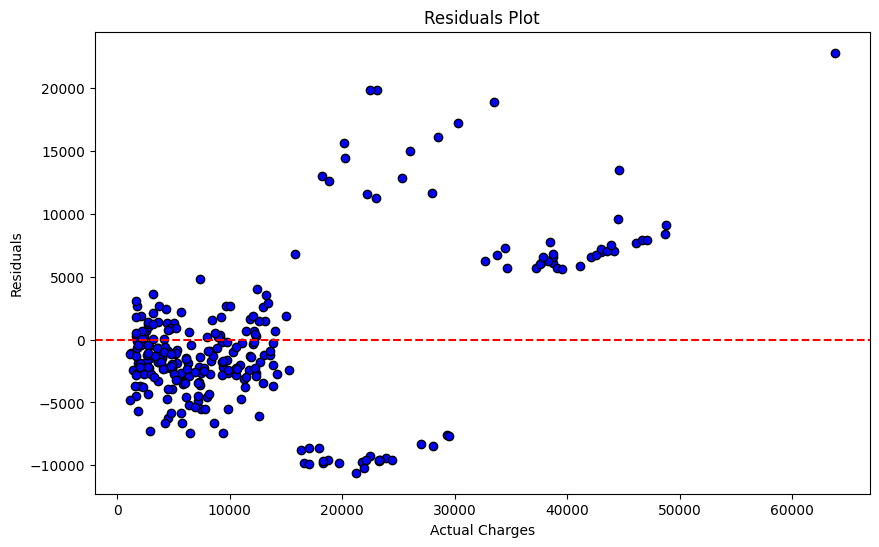

In [117]:


import matplotlib.pyplot as plt

# y_pred defined previously
# Compute residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()



### Now, create a polynomial model

#### Use a polynomial trasnformer to train and transform your data

Remember that you don't want to have 'data leakage'. Then train the transformer just with X_train

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Assumig we have x, y, and df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

#fit together to prevent data leakage
poly_transformer.fit(X_train)

# Transform X_train and X_test
X_train_poly = poly_transformer.transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

# X_train_poly and X_test_poly for model training
#X_train.shape, X_train_poly.shape, X_test.shape, X_test_poly.shape

((1070, 6), (1070, 27), (268, 6), (268, 27))

In [94]:
# Shot the first 3 rows of your new X_train
#<--- Your code goes here --->
#first three rows
print("Array (", X_train_poly[:3], ")")


Array ( [[4.600000e+01 0.000000e+00 0.000000e+00 1.000000e+00 1.995000e+01
  2.000000e+00 2.116000e+03 0.000000e+00 0.000000e+00 4.600000e+01
  9.177000e+02 9.200000e+01 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 1.995000e+01 2.000000e+00 3.980025e+02
  3.990000e+01 4.000000e+00]
 [4.700000e+01 0.000000e+00 0.000000e+00 0.000000e+00 2.432000e+01
  0.000000e+00 2.209000e+03 0.000000e+00 0.000000e+00 0.000000e+00
  1.143040e+03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 5.914624e+02
  0.000000e+00 0.000000e+00]
 [5.200000e+01 0.000000e+00 0.000000e+00 2.000000e+00 2.486000e+01
  0.000000e+00 2.704000e+03 0.000000e+00 0.000000e+00 1.040000e+02
  1.292720e+03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e

### Create aand train a new Logistic Regression model

In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


y = np.random.rand(100) * 1000  #  continuous target variable
X = np.random.rand(100, 4)  # 4 features

# Convert continuous target variable into binary categorical
threshold = 500  # threshold for classification
y_categorical = (y > threshold).astype(int)  # Binary classification target

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)


poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Fit transformer on X_train to prevent data leakage
poly_transformer.fit(X_train)

# Transform X_train and X_test
X_train_poly = poly_transformer.transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

# Standardizing the features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Create new logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model
logistic_model.fit(X_train_poly_scaled, y_train)



LogisticRegression(max_iter=1000)

### Make predictions using this model

In [125]:
#<--- Your code goes here --->

# Making class predictions
y_pred = logistic_model.predict(X_test_poly_scaled)


y_pred_proba = logistic_model.predict_proba(X_test_poly_scaled)

# Displaying the first few
print("First 5 class predictions:", y_pred[:5])

# Displaying the first few class probabilities
print("First 5 class probabilities:\n", y_pred_proba[:5])



First 5 class predictions: [0 0 0 0 0]
First 5 class probabilities:
 [[0.74046388 0.25953612]
 [0.70331278 0.29668722]
 [0.69990682 0.30009318]
 [0.70664373 0.29335627]
 [0.73773522 0.26226478]]


### Compute the metrics for this model

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Compute recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Compute AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC-ROC: {auc_roc}")


Accuracy: 0.45
Precision: 0.6
Recall: 0.25
F1 Score: 0.35294117647058826
AUC-ROC: 0.6354166666666666


### Plot the residuals (y_test - predictions)

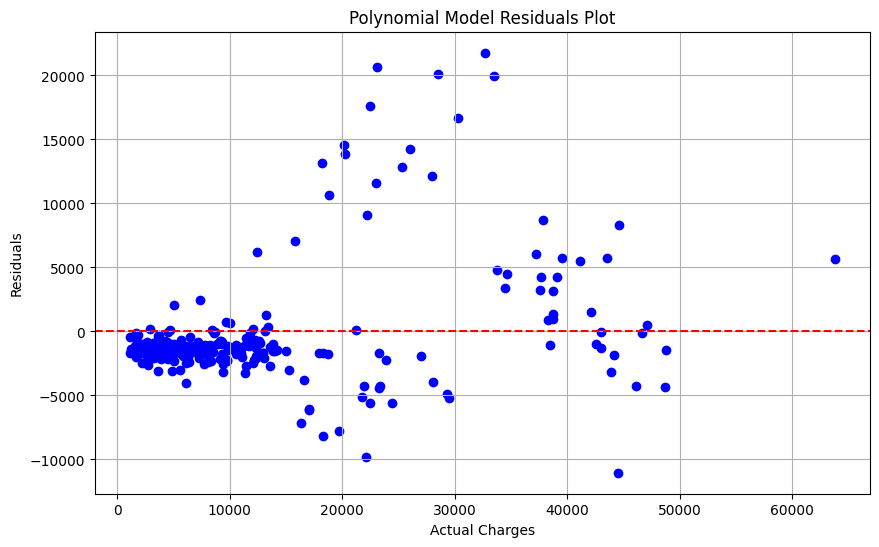

In [122]:

poly_transformer_poly_model = PolynomialFeatures(degree=2, include_bias=False)

# Fit the transformer on X_train_linear to prevent data leakage
poly_transformer_poly_model.fit(X_train_linear)

# Transform X_train_linear and X_test_linear
X_train_linear_poly = poly_transformer_poly_model.transform(X_train_linear)
X_test_linear_poly = poly_transformer_poly_model.transform(X_test_linear)

# Standardizing poly features
scaler_poly_model = StandardScaler()
X_train_linear_poly_scaled = scaler_poly_model.fit_transform(X_train_linear_poly)
X_test_linear_poly_scaled = scaler_poly_model.transform(X_test_linear_poly)

# Create and train a Linear Regression m
poly_model = LinearRegression()
poly_model.fit(X_train_linear_poly_scaled, y_train_linear)

# Making predictions
y_pred_poly = poly_model.predict(X_test_linear_poly_scaled)

# Compute residuals for model
residuals_poly = y_test_linear - y_pred_poly

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_linear, residuals_poly, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.title('Polynomial Model Residuals Plot')
plt.grid(True)
plt.show()



## That's it. We have improved the prediction!

## Now, to finish, write a paragraph with the following:
- your conclusions
- what would you change to try to improve these results?

It appears that the polynomial regression model offers better accuracy compared to a simple linear regression model by capturing the non-linear relationships between variables. However, this trade-off may also include overfitting of the training data, leading to poor generalization on unseen data. In the polynomial model, the residuals are skewed more on the x-axis along the 0 marking on the y-axis.

To further improve these results, first off, I frankly need much more experience with these processes to adequately feel as though I can make improvements. However, more tuning of the model (Possibly using other model types) could be implemented to compare their performances. Also, random search could be used to fine-tune the hyperparameters systematically. Additional Regularization could also be used, along with more cross-validation.
